In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

import sys
sys.path.append('./src')

from lwlr import LW_LinReg, LW_LogReg

In [2]:
data = pd.read_csv("data/dataset_regresion.csv")

X = data["X"].values.reshape(-1, 1)
y = data["y"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

taus = [0.005, 0.01, 0.1, 1, 10, 50]
predictions = {tau: LW_LinReg(X_train, y_train, X_test, tau=tau) for tau in taus}

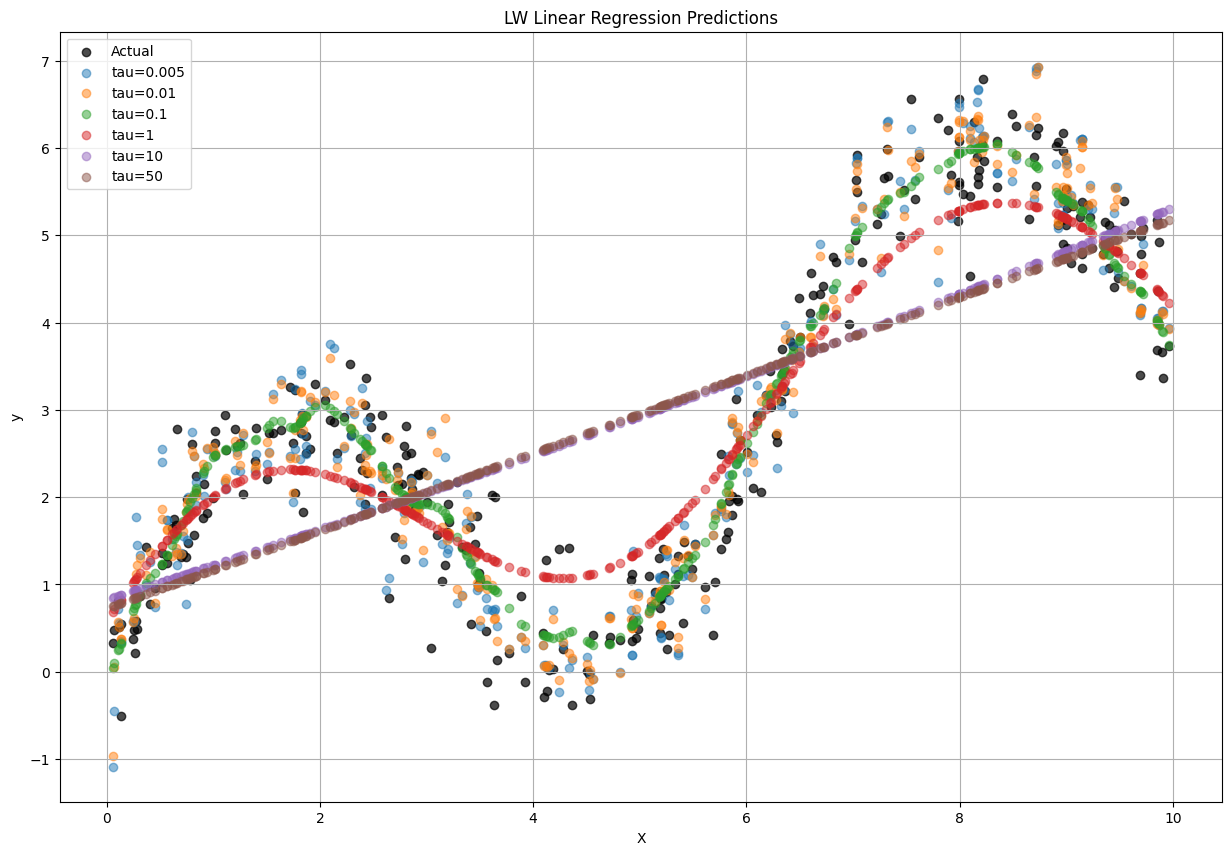

In [6]:
plt.figure(figsize=(15, 10)) # CAMBIAR LOS COLORES A UNA ESCALA de tau

plt.scatter(X_test, y_test, color='black', label='Actual', alpha=0.7)
for tau, y_pred in predictions.items():
    plt.scatter(X_test, y_pred, label=f"tau={tau}", alpha=0.5)

plt.title("LW Linear Regression Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.savefig("../output/lw_linear_regression_tau_coparison.png")
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error

print("\nMSE in testing for each tau:")
for tau, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    print(f"τ = {tau:<5}  ->  MSE: {mse:.4f}")


MSE in testing for each tau:
τ = 0.005  ->  MSE: 0.4123
τ = 0.01   ->  MSE: 0.3596
τ = 0.1    ->  MSE: 0.2298
τ = 1      ->  MSE: 0.4405
τ = 10     ->  MSE: 1.7776
τ = 50     ->  MSE: 1.8189


In [3]:
datos = pd.read_csv("data/dataset_clasificacion.csv")

X = datos[["X1", "X2"]].values
y = datos["Clase"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
h = 0.3  # resolución baja para acelerar
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

In [8]:

zz = LW_LogReg(X_train, y_train, grid, tau=.1, max_iter=110)

In [15]:
yy.shape

(12, 17)

In [6]:
z_full = zz.reshape(12, 17)

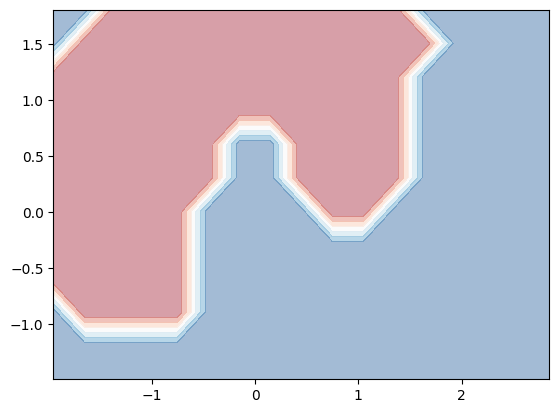

In [7]:
plt.contourf(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h), z_full, alpha=0.4, cmap="RdBu")

In [15]:
# Función para graficar la frontera
def plot_lwlr_decision_boundary(X_train, y_train, tau, title):
    h = 0.3  # resolución baja para acelerar
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Tomar muestra de puntos
    np.random.seed(0)
    sample_indices = np.random.choice(len(grid), size=200, replace=False)
    grid_sampled = grid[sample_indices]
    Z_sampled = LW_LogReg(X_train, y_train, grid, tau, max_iter=100, lr=0.01)

    # Malla con NaN y rellenar los puntos calculados
    Z_full = np.full(xx.shape, np.nan)
    for idx, (x_val, y_val) in enumerate(grid):
        i = int((y_val - y_min) / h) 
        j = int((x_val - x_min) / h)
        if 0 <= i < Z_full.shape[0] and 0 <= j < Z_full.shape[1]:
            Z_full[i, j] = Z_sampled[idx]
      
    # Graficamos
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z_full, alpha=0.4, cmap='RdBu')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='RdBu', alpha=0.7)
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.tight_layout()
    plt.show()


C:\Users\Estudio\AppData\Local\Temp\ipykernel_4452\1492161225.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z_full[i, j] = Z_sampled[idx]


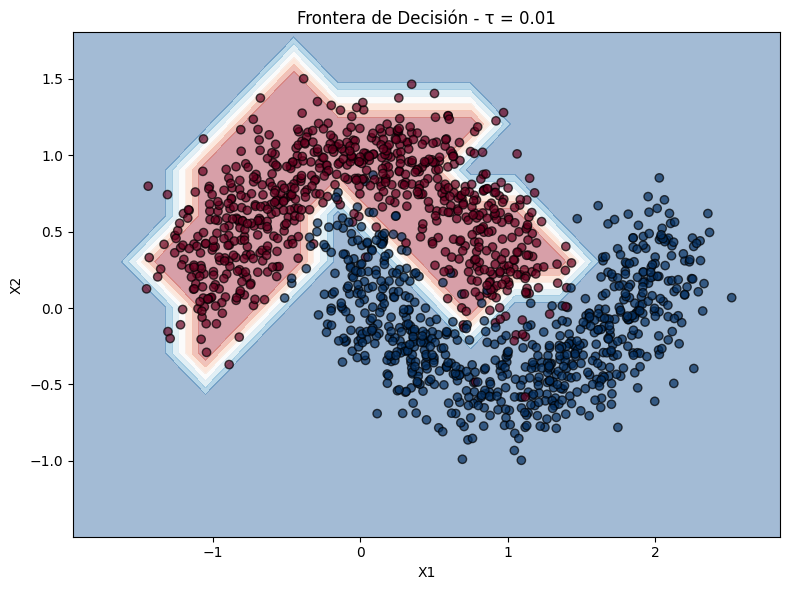

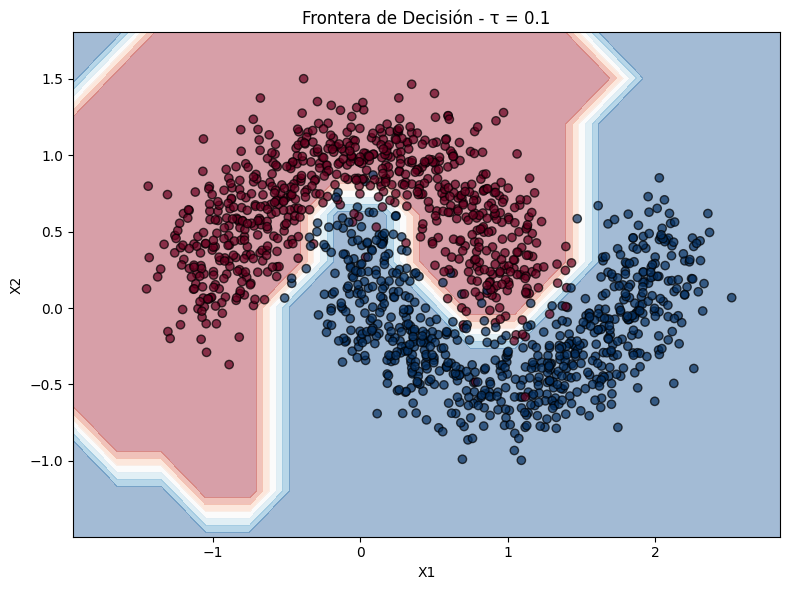

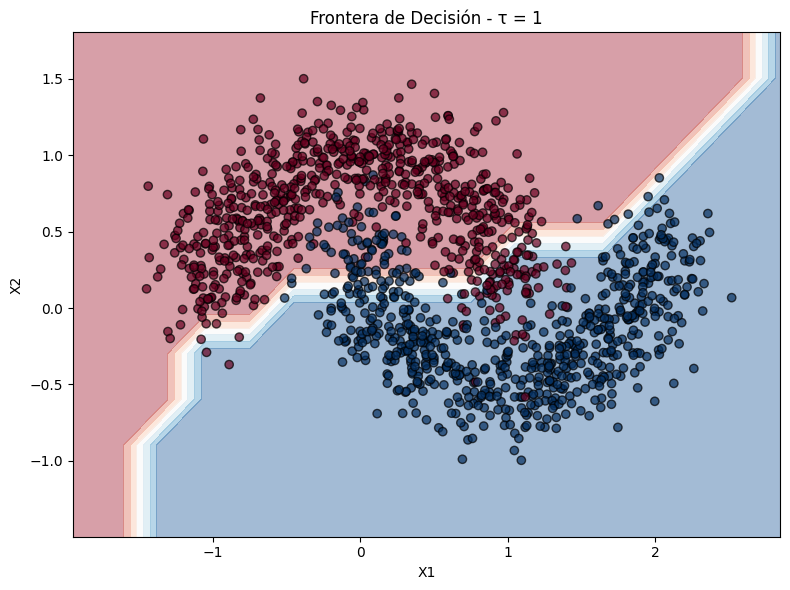

KeyboardInterrupt: 

In [16]:
# Ejecutar para distintos τ
taus = [0.01, 0.1, 1, 10]
for tau in taus:
    plot_lwlr_decision_boundary(X_train, y_train, tau, title=f"Frontera de Decisión - τ = {tau}")